## Neural Network Regression with Tensorflow

### What is a regression problem?

There are many definitions for a regression problem but in our case, we're going to simplify it to be: predicting a number.

For example, you might want to:

* Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
* Predict the coordinates of a bounding box of an item in an image.
* Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).


In this notebook, we're going to set the foundations for how you can take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.

### What we're going to cover

Specifically, we're going to go through doing the following with TensorFlow:

* Architecture of a regression model
* Input shapes and output shapes
    * X: features/data (inputs)
    * y: labels (outputs)
* Creating custom data to view and fit
* Steps in modelling
    * Creating a model
    * Compiling a model
        * Defining a loss function
        * Setting up an optimizer
        * Creating evaluation metrics
    * Fitting a model (getting it to find patterns in our data)
* Evaluating a model
    * Visualizng the model ("visualize, visualize, visualize")
    * Looking at training curves
    * Compare predictions to ground truth (using our evaluation metrics)
* Saving a model (so we can use it later)
* Loading a model

Don't worry if none of these make sense now, we're going to go through each.



### Typical architecture of a regresison neural network

The word typical is on purpose.

Why?

Because there are many different ways (actually, there's almost an infinite number of ways) to write neural networks.

But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputing some kind of target number.

Yes, the previous sentence is vague but we'll see this in action shortly.

![Hyperparameters and typical values](./Images/RegressionParameters.png)

Again, if you're new to neural networks and deep learning in general, much of the above table won't make sense. But don't worry, we'll be getting hands-on with all of it soon.

🔑 Note: A hyperparameter in machine learning is something a data analyst or developer can set themselves, where as a parameter usually describes something a model learns on its own (a value not explicitly set by an analyst).

Okay, enough talk, let's get started writing code.

To use TensorFlow, we'll import it as the common alias tf (short for TensorFlow).

In [1]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

Init Plugin
2.5.0
Init Graph Optimizer
Init Kernel


## Creating data to view and fit

Since we're working on a regression problem (predicting a number) let's create some linear data (a straight line) to model.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

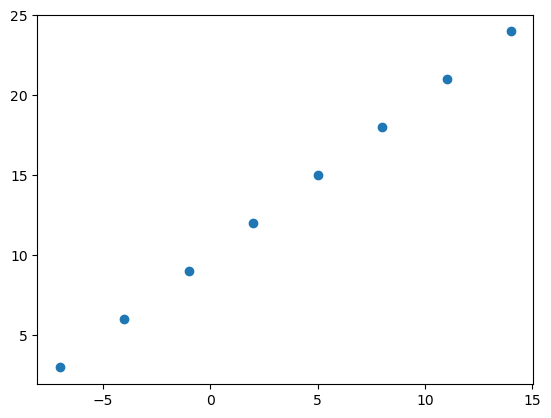

In [3]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

Before we do any modelling, can you calculate the pattern between X and y?

For example, say I asked you, based on this data what the y value would be if X was 17.0?

Or how about if X was -10.0?

This kind of pattern discovery is the essence of what we'll be building neural networks to do for us.

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Regression input shapes and output shapes

One of the most important concepts when working with neural networks are the input and output shapes.

The input shape is the shape of your data that goes into the model.

The output shape is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before, we created data using NumPy arrays, but we could do the same with tensors.

So our input will be X and our output will be y.

Knowing this, what do you think our input and output shapes will be?

Let's take a look.

In [5]:
# Take a single example of X
input_shape = X[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

((), ())

Huh?

From this it seems our inputs and outputs have no shape?

How could that be?

It's because no matter what kind of data we pass to our model, it's always going to take as input and return as ouput some kind of tensor.

But in our case because of our dataset (only 2 small lists of numbers), we're looking at a special kind of tensor, more specifically a rank 0 tensor or a scalar.

In [6]:
# Let's take a look at the single examples invidually
X[0], y[0]

(-7.0, 3.0)

In our case, we're trying to build a model to predict the pattern between X[0] equalling -7.0 and y[0] equalling 3.0.

So now we get our answer, we're trying to use 1 X value to predict 1 y value.

You might be thinking, "this seems pretty complicated for just predicting a straight line...".

And you'd be right.

But the concepts we're covering here, the concepts of input and output shapes to a model are fundamental.

In fact, they're probably two of the things you'll spend the most time on when you work with neural networks: making sure your input and outputs are in the correct shape.

If it doesn't make sense now, we'll see plenty more examples later on (soon you'll notice the input and output shapes can be almost anything you can imagine).

## Steps in modelling with TensorFlow

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data (how does X get to y).

Let's see these in action using the Keras Sequential API to build a model for our regression data. And then we'll step through each.

**Note: If you're using TensorFlow 2.7.0+, the fit() function no longer upscales input data to go from (batch_size, ) to (batch_size, 1). To fix this, you'll need to expand the dimension of input data using tf.expand_dims(input_data, axis=-1).**

In our case, this means instead of using model.fit(X, y, epochs=5), use model.fit(tf.expand_dims(X, axis=-1), y, epochs=5).

In [7]:
# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

Metal device set to: Apple M1


2022-12-06 00:33:15.183957: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-06 00:33:15.184326: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [10]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

2022-12-06 00:39:46.741527: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-12-06 00:39:46.741743: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/5


2022-12-06 00:39:47.031402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 16.4449 - mae: 16.4449
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 16.1637 - mae: 16.1637
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 15.8824 - mae: 15.8824
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 15.6012 - mae: 15.6012
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 15.3199 - mae: 15.3199


In [11]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

What do you think the outcome should be if we passed our model an X value of 17.0?

In [12]:
# Make a prediction with the model
model.predict([17.0])

2022-12-06 00:41:11.568439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[-7.4645805]], dtype=float32)

It doesn't go very well... it should've output something close to 27.0.

🤔 Question: What's Keras? I thought we were working with TensorFlow but every time we write TensorFlow code, keras comes after tf (e.g. tf.keras.layers.Dense())?

Before TensorFlow 2.0+, Keras was an API designed to be able to build deep learning models with ease. Since TensorFlow 2.0+, its functionality has been tightly integrated within the TensorFlow library.

## Improving a model

#### How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

**Creating a model**  - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.

**Compiling a model** - you might want to choose optimization function or perhaps change the learning rate of the optimization function.

**Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as hyperparameters and the practice of trying to find the best hyperparameters is referred to as hyperparameter tuning.

Woah. We just introduced a bunch of possible steps. The important thing to remember is how you alter each of these will depend on the problem you're working on.

And the good thing is, over the next few problems, we'll get hands-on with all of them.

For now, let's keep it simple, all we'll do is train our model for longer (everything else will stay the same).

In [13]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 0s 92ms/step - loss: 16.4449 - mae: 16.4449
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 16.1637 - mae: 16.1637
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 15.8824 - mae: 15.8824
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 15.6012 - mae: 15.6012
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 15.3199 - mae: 15.3199
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 15.0387 - mae: 15.0387
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 14.8158 - mae: 14.8158
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 14.6833 - mae: 14.6833
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 14.5508 - mae: 14.5508
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 14.4183 - mae: 14.4183
Epoch 11/100
1/1 [==============================] - 0s 3ms

2022-12-06 00:47:12.039163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 29/100
1/1 [==============================] - 0s 4ms/step - loss: 11.9008 - mae: 11.9008
Epoch 30/100
1/1 [==============================] - 0s 7ms/step - loss: 11.7683 - mae: 11.7683
Epoch 31/100
1/1 [==============================] - 0s 3ms/step - loss: 11.6358 - mae: 11.6358
Epoch 32/100
1/1 [==============================] - 0s 8ms/step - loss: 11.5033 - mae: 11.5033
Epoch 33/100
1/1 [==============================] - 0s 4ms/step - loss: 11.3708 - mae: 11.3708
Epoch 34/100
1/1 [==============================] - 0s 6ms/step - loss: 11.2383 - mae: 11.2383
Epoch 35/100
1/1 [==============================] - 0s 3ms/step - loss: 11.1058 - mae: 11.1058
Epoch 36/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9733 - mae: 10.9733
Epoch 37/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8408 - mae: 10.8408
Epoch 38/100
1/1 [==============================] - 0s 4ms/step - loss: 10.7083 - mae: 10.7083
Epoch 39/100
1/1 [==============================] 

You might've noticed the loss value decrease from before (and keep decreasing as the number of epochs gets higher).

What do you think this means for when we make a prediction with our model?

How about we try predict on 17.0 again?

In [14]:
# Remind ourselves of what X and y are
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

2022-12-06 00:49:10.884021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[29.392914]], dtype=float32)

Much better!

We got closer this time. But we could still be better.

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


2022-12-06 10:07:42.612748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 962ms/step - loss: 13.3668 - mae: 13.3668
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 12.8411 - mae: 12.8411
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 12.3333 - mae: 12.3333
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 11.8177 - mae: 11.8177
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 11.2881 - mae: 11.2881
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.7429 - mae: 10.7429
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1783 - mae: 10.1783
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 9.5947 - mae: 9.5947
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 8.9764 - mae: 8.9764
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 8.3184 - mae: 8.3184
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 7.6

1/1 [==============================] - 0s 4ms/step - loss: 3.7555 - mae: 3.7555
Epoch 90/100
1/1 [==============================] - 0s 4ms/step - loss: 3.6952 - mae: 3.6952
Epoch 91/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7286 - mae: 3.7286
Epoch 92/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7041 - mae: 3.7041
Epoch 93/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7016 - mae: 3.7016
Epoch 94/100
1/1 [==============================] - 0s 5ms/step - loss: 3.7183 - mae: 3.7183
Epoch 95/100
1/1 [==============================] - 0s 4ms/step - loss: 3.6798 - mae: 3.6798
Epoch 96/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7280 - mae: 3.7280
Epoch 97/100
1/1 [==============================] - 0s 4ms/step - loss: 3.6646 - mae: 3.6646
Epoch 98/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7239 - mae: 3.7239
Epoch 99/100
1/1 [==============================] - 0s 4ms/step - loss: 3.6735 - ma

In [17]:
model.predict([17.0])

2022-12-06 10:09:15.240491: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[32.413616]], dtype=float32)

this shows overfitting of the data as the previous model actually predicted better. 

Now we've trained a model, how could we evaluate it?

## Evaluating a model

A typical workflow you'll go through when building neural networks is:

**Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...**

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

**Visualize, visualize, visualize**

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize."

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:

* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

**Let's start by visualizing the model.**

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).

In [18]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [19]:
# Make labels for the dataset (adhering to the same pattern as before)
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

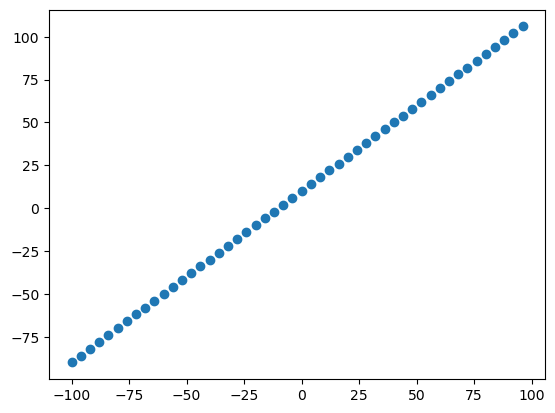

In [21]:
#Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

## Split data into training/test set

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:

* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our X and y arrays.

🔑 Note: When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it generalizes to unseen examples.

In [22]:
# Check how many samples we have
len(X)

50

In [23]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

## Visualizing the data

Now we've got our training and test data, it's a good idea to visualize it.

Let's plot it with some nice colours to differentiate what's what.

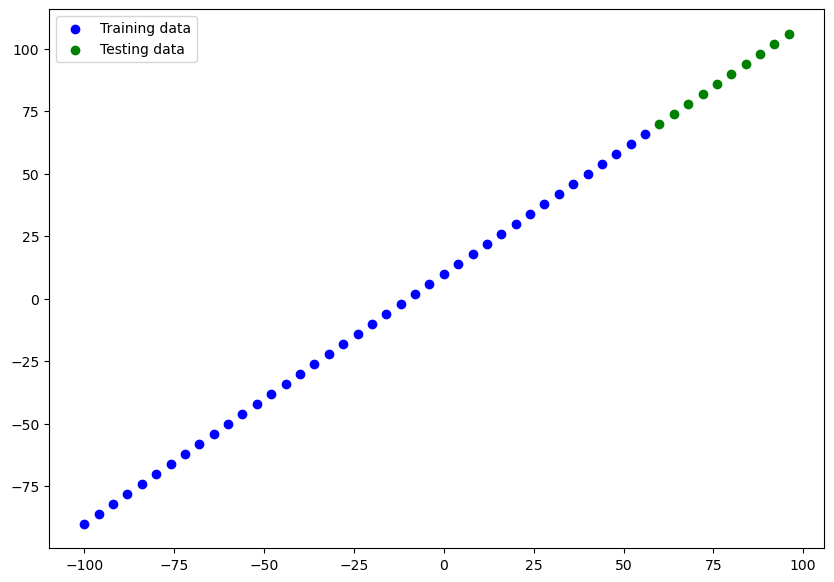

In [24]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

Beautiful! Any time you can visualize your data, your model, your anything, it's a good idea.

With this graph in mind, what we'll be trying to do is build a model which learns the pattern in the blue dots (X_train) to draw the green dots (X_test).

Time to build a model. We'll make the exact same one from before (the one we trained for longer).

In [25]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (same as above)
#model.fit(X_train, y_train, epochs=100) # commented out on purpose (not fitting it just yet)

Visualizing the model

After you've built a model, you might want to take a look at it (especially if you haven't built many before).

You can take a look at the layers and shapes of your model by calling summary() on it.

🔑 Note: Visualizing a model is particularly helpful when you run into input and output shape mismatches.

In [26]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

Ahh, the cell above errors because we haven't fit our built our model.

We also haven't told it what input shape it should be expecting.

Remember above, how we discussed the input shape was just one number?

We can let our model know the input shape of our data using the input_shape parameter to the first layer (usually if input_shape isn't defined, Keras tries to figure it out automatically).

In [27]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Calling summary() on our model shows us the layers it contains, the output shape and the number of parameters.

Total params - total number of parameters in the model.
Trainable parameters - these are the parameters (patterns) the model can update as it trains.
Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).
📖 Resource: For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

🛠 Exercise: Try playing around with the number of hidden units in the Dense layer (e.g. Dense(2), Dense(3)). How does this change the Total/Trainable params? Investigate what's causing the change.

For now, all you need to think about these parameters is that their learnable patterns in the data.

Let's fit our model to the training data.

In [29]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output

2022-12-06 10:29:38.262231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [30]:
# Check the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Alongside summary, you can also view a 2D plot of the model using plot_model().

In [33]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


## Visualizing the predictions

Now we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of **y_test vs. y_pred (ground truth vs. predictions)**.

First, we'll make some predictions on the test data (X_test), remember the model has never seen the test data.

In [34]:
# Make predictions
y_preds = model.predict(X_test)

2022-12-06 10:47:50.700413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [35]:
# View the predictions
y_preds

array([[ 74.62895],
       [ 79.51876],
       [ 84.40857],
       [ 89.29837],
       [ 94.18818],
       [ 99.07798],
       [103.96779],
       [108.85759],
       [113.7474 ],
       [118.63721]], dtype=float32)

Okay, we get a list of numbers but how do these compare to the ground truth labels?

Let's build a plotting function to find out.

🔑 Note: If you think you're going to be visualizing something a lot, it's a good idea to functionize it so you can use it later.

In [36]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
    """
      Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend();
    

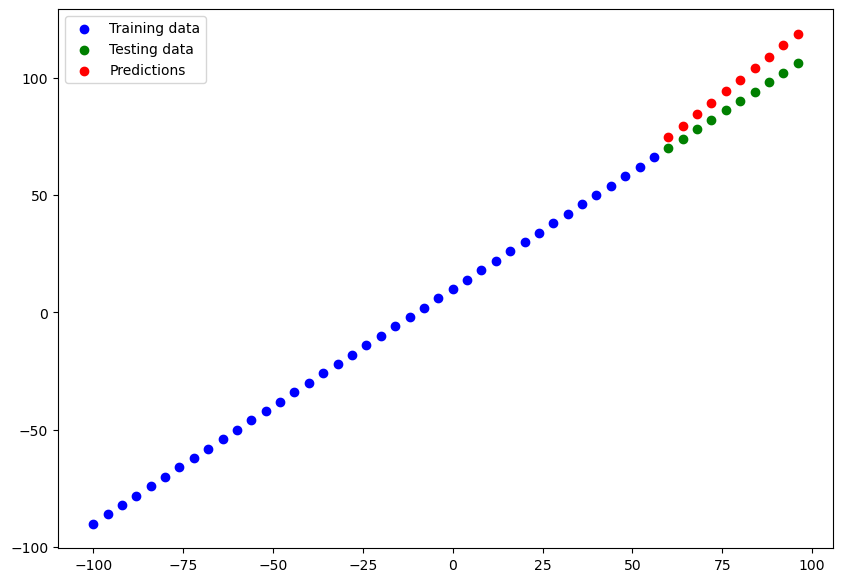

In [37]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

From the plot we can see our predictions aren't totally outlandish but they definitely aren't anything special either.

## Evaluating predictions

Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

You can also use **model.evaluate()** which will return the loss of the model as well as any metrics setup during the compile step.

In [38]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 65ms/step - loss: 8.6331 - mae: 8.6331


2022-12-06 10:54:08.287500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[8.633079528808594, 8.633079528808594]

In our case, since we used MAE for the loss function as well as MAE for the metrics, model.evaulate() returns them both.

TensorFlow also has built in functions for MSE and MAE.

For many evaluation functions, the premise is the same: compare predictions to the ground truth labels.

In [39]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([14.422629, 11.792496, 10.318286, 10.      , 10.875272, 13.046788,
       16.374231, 20.85759 , 25.7474  , 30.637207], dtype=float32)>

Huh? That's strange, MAE should be a single output.

Instead, we get 10 values.

This is because our y_test and y_preds tensors are different shapes.

In [40]:
# Check the test label tensor values
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [41]:
# Check the predictions tensor values (notice the extra square brackets)
y_preds

array([[ 74.62895],
       [ 79.51876],
       [ 84.40857],
       [ 89.29837],
       [ 94.18818],
       [ 99.07798],
       [103.96779],
       [108.85759],
       [113.7474 ],
       [118.63721]], dtype=float32)

In [42]:
# Check the tensor shapes
y_test.shape, y_preds.shape

(TensorShape([10]), (10, 1))

Remember how we discussed dealing with different input and output shapes is one the most common issues you'll come across, this is one of those times.

But not to worry.

We can fix it using squeeze(), it'll remove the the 1 dimension from our y_preds tensor, making it the same shape as y_test.

🔑 Note: If you're comparing two tensors, it's important to make sure they're the right shape(s) (you won't always have to manipulate the shapes, but always be on the look out, many errors are the result of mismatched tensors, especially mismatched input and output shapes).

In [43]:
# Shape after squeeze()
y_preds.squeeze().shape

(10,)

In [44]:
# What do they look like?
y_test, y_preds.squeeze()

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([ 74.62895,  79.51876,  84.40857,  89.29837,  94.18818,  99.07798,
        103.96779, 108.85759, 113.7474 , 118.63721], dtype=float32))

In [45]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae
     

<tf.Tensor: shape=(), dtype=float32, numpy=8.63308>

In [46]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=81.062035>

In [47]:
# Returns the same as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=int32, numpy=8>

Again, it's a good idea to functionize anything you think you might use over again (or find yourself using over and over again).

Let's make functions for our evaluation metrics.

In [48]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

## Running experiments to improve a model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

* **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
* **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
* **Train for longer** - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

* model_1 - same as original model, 1 layer, trained for 100 epochs.
* model_2 - 2 layers, trained for 100 epochs.
* model_3 - 2 layers, trained for 500 epochs.

### Build model_1

In [49]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 67.6481 - mae: 67.6481
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 32.4999 - mae: 32.4999
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 9.6517 - mae: 9.6517
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 11.7655 - mae: 11.7655
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.8333 - mae: 10.8333
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 10.0187 - mae: 10.0187
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0647 - mae: 9.0647
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.1030 - mae: 9.1030
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 19.9556 - mae: 19.9556
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.7967 - mae: 10.7967
Epoch 11/100
2/2 [==============================] - 0s 5ms/step 

2022-12-06 11:06:30.988360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 5ms/step - loss: 8.5112 - mae: 8.5112
Epoch 17/100
2/2 [==============================] - 0s 5ms/step - loss: 13.5484 - mae: 13.5484
Epoch 18/100
2/2 [==============================] - 0s 4ms/step - loss: 11.3499 - mae: 11.3499
Epoch 19/100
2/2 [==============================] - 0s 4ms/step - loss: 18.0893 - mae: 18.0893
Epoch 20/100
2/2 [==============================] - 0s 5ms/step - loss: 15.2227 - mae: 15.2227
Epoch 21/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1709 - mae: 11.1709
Epoch 22/100
2/2 [==============================] - 0s 6ms/step - loss: 8.2951 - mae: 8.2951
Epoch 23/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4451 - mae: 9.4451
Epoch 24/100
2/2 [==============================] - 0s 5ms/step - loss: 7.7110 - mae: 7.7110
Epoch 25/100
2/2 [==============================] - 0s 4ms/step - loss: 12.9899 - mae: 12.9899
Epoch 26/100
2/2 [==============================] - 0s 7ms/step - loss:

2022-12-06 11:07:28.392060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


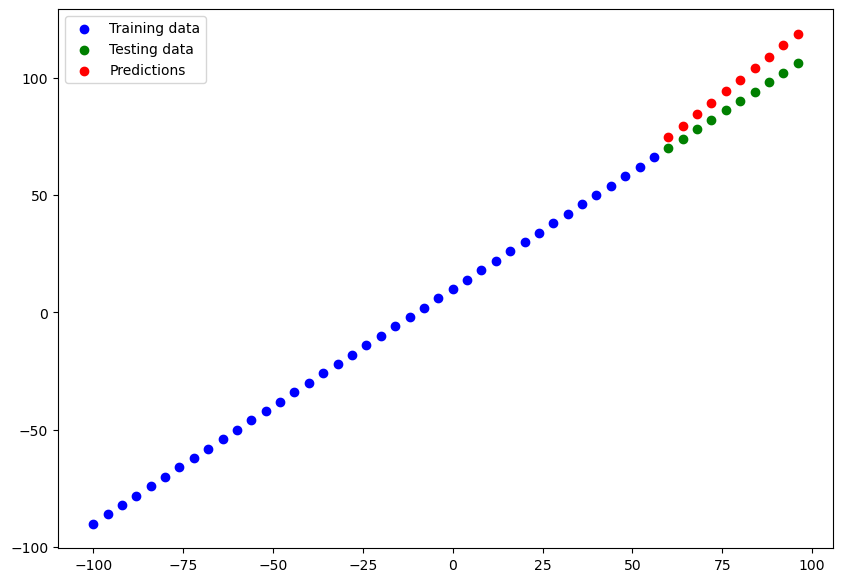

In [50]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [51]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(8.63308, 81.062035)

### Build model_2

This time we'll add an extra dense layer (so now our model will have 2 layers) whilst keeping everything else the same.